In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "sisi"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from Utils.data_utils import load_train_test_data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from pandas import Timestamp
import time
import pickle
import warnings
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

In [3]:
(train_list, test_list), state_list = load_train_test_data(pwd)

In [4]:
for i in range(len(train_list)):
    train_list[i] = train_list[i].reset_index()
    train_list[i].rename(columns = {'Date':'ds', 'carbon_per_MWh':'y'}, inplace = True)
    train_list[i]['ds'] = train_list[i]['ds'].apply(lambda x : x.replace(tzinfo=None))

In [10]:
for i in range(len(test_list)):
    test_list[i] = test_list[i].reset_index()
    test_list[i].rename(columns = {'Date':'ds', 'carbon_per_MWh':'y'}, inplace = True)
    test_list[i]['ds'] = test_list[i]['ds'].apply(lambda x : x.replace(tzinfo=None))

In [15]:
predictions = []
errors = []
for train, test in zip(train_list, test_list):
    m = Prophet()
    m.fit(train)
    forecast = m.predict(test)
    predictions.append(forecast['yhat'])
    errors.append(mean_absolute_error(test['y'], forecast['yhat']))

Initial log joint probability = -330.137
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       52097.9    0.00658224       504.439           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       52172.2    0.00973145        2824.4      0.6812      0.6812      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         52195     0.0286834       4093.46     0.07366           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       52222.9    0.00107075       183.339           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         52233    0.00171836       360.095     0.08696           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

Initial log joint probability = -198.099
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       68847.9     0.0191901       8967.86           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       69496.1     0.0714901       4551.61           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       69637.1    0.00393378       2224.95      0.1151      0.9688      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       69745.1    0.00295475       1105.03      0.3715      0.8473      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       69899.9     0.0273167       1057.13           1           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

Initial log joint probability = -2100.63
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       42715.5     0.0195475          2502      0.9584     0.09584      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       43667.1     0.0356863       1212.03           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       44217.5     0.0596474       3269.95      0.4308      0.4308      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       44430.4    0.00314868       825.766           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         44488     0.0192963       488.067           1           1      583   
    Iter      log prob        ||dx||      ||grad||       alpha  

Initial log joint probability = -187.901
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       73876.7     0.0280107       3933.22           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       74863.6     0.0100148       4509.42      0.5184           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       75196.7     0.0176834       3782.11           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       75577.5     0.0155666       2427.69           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       75744.7     0.0434979       4494.34           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

Initial log joint probability = -824.91
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       62137.3      0.022519       5822.08      0.3998           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       62501.3    0.00536485       1847.26      0.8829      0.8829      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       62585.7    0.00974497       1925.82           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       62662.8    0.00295187       679.323           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       62729.5     0.0162797       3517.01           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha   

Initial log joint probability = -405.482
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       64869.8     0.0247649       3921.11           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       65373.9      0.018023        5064.6           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       65617.7   0.000914568       1070.99           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       66109.2     0.0433492        8747.3           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       66235.1    0.00515334       740.792           1           1      558   
    Iter      log prob        ||dx||      ||grad||       alpha  

Initial log joint probability = -534.409
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       59530.3     0.0582124       7770.63           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       60151.5    0.00548631       1495.58           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         60387     0.0212794       2731.23       1.626      0.1626      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       60452.4    0.00427723       431.318           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       60497.5     0.0103784       1448.44           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [17]:
for state, error in zip(state_list, errors):
    print(f"MAE for {state} = {error}")

MAE for Texas = 63.5680570215602
MAE for Carolinas = 96.46507795466925
MAE for Florida = 52.77798589424307
MAE for Southeast = 65.73875354475709
MAE for Tennessee = 70.74465189518048
MAE for Central = 99.29799166014138
MAE for Southwest = 44.20555152712925
MAE for Midwest = 75.76821575369691
MAE for New-York = 24.887983130523825
MAE for Mid-Atlantic = 32.59461018306787
MAE for New-England = 38.72465272838823
MAE for California = 37.88490577546292
MAE for Northwest = 87.3517136621658


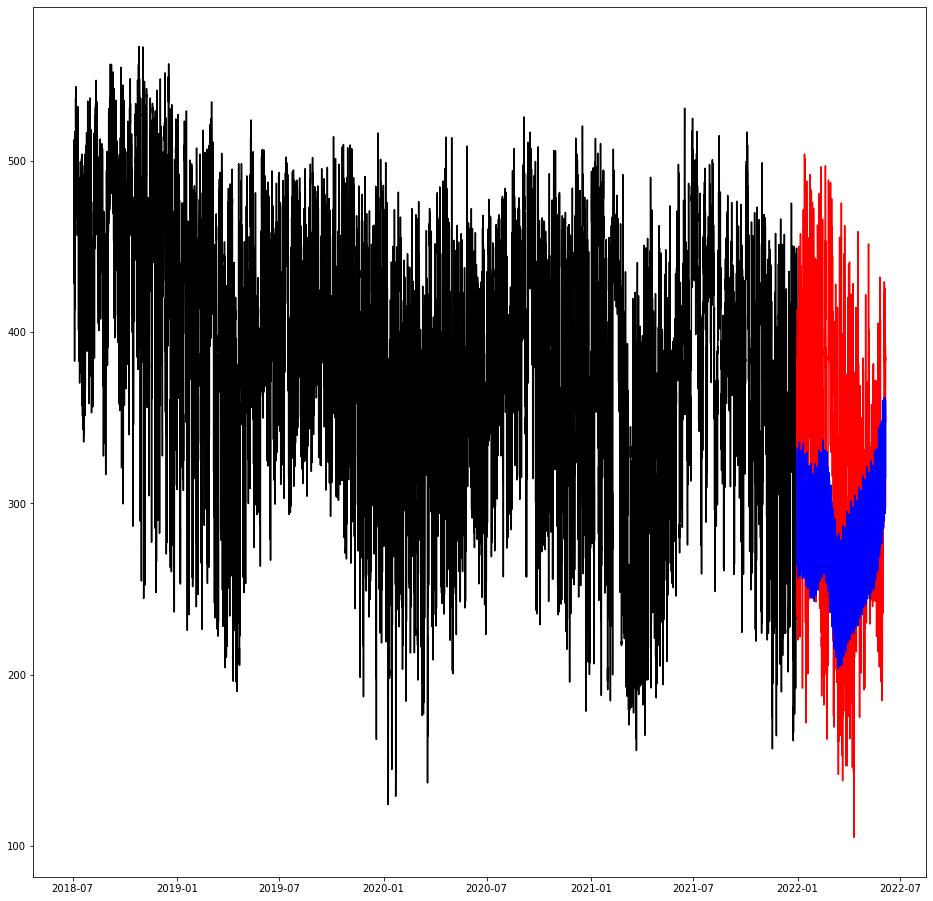

In [20]:
plt.figure(figsize=(16,16))
plt.plot(train_list[0]['ds'], train_list[0]['y'], color='black')
plt.plot(test_list[0]['ds'], test_list[0]['y'], color='red')
plt.plot(test_list[0]['ds'], predictions[0], color='blue')

In [21]:
hour_dict_list = []
for i in range(len(test_list)):
    hour_dict = {test_list[i]['ds'][j] : predictions[i][j] for j in range(len(predictions[i]))}
    hour_dict_list.append(hour_dict)

In [27]:
hour_dict_list[1]

{Timestamp('2021-12-31 01:00:00'): 219.17666516822433,
 Timestamp('2021-12-31 02:00:00'): 216.90190805232288,
 Timestamp('2021-12-31 03:00:00'): 211.81571792500506,
 Timestamp('2021-12-31 04:00:00'): 205.80973006636364,
 Timestamp('2021-12-31 05:00:00'): 199.8919413509838,
 Timestamp('2021-12-31 06:00:00'): 194.23369956089442,
 Timestamp('2021-12-31 07:00:00'): 189.1162053248786,
 Timestamp('2021-12-31 08:00:00'): 185.4777267616065,
 Timestamp('2021-12-31 09:00:00'): 184.26724310162535,
 Timestamp('2021-12-31 10:00:00'): 185.21238422492866,
 Timestamp('2021-12-31 11:00:00'): 186.4174941227526,
 Timestamp('2021-12-31 12:00:00'): 185.5163316504075,
 Timestamp('2021-12-31 13:00:00'): 181.54794039114097,
 Timestamp('2021-12-31 14:00:00'): 175.8698625750793,
 Timestamp('2021-12-31 15:00:00'): 171.19334056050585,
 Timestamp('2021-12-31 16:00:00'): 169.53940814356693,
 Timestamp('2021-12-31 17:00:00'): 170.9227519349959,
 Timestamp('2021-12-31 18:00:00'): 173.8742290729311,
 Timestamp('2021-1

In [28]:
predictions[1]

0       219.176665
1       216.901908
2       211.815718
3       205.809730
4       199.891941
           ...    
3743    222.031495
3744    224.274592
3745    222.175616
3746    217.296697
3747    211.531295
Name: yhat, Length: 3748, dtype: float64

In [29]:
file = open(f'{pwd}/data/predictions/prophet_pred_usa.pkl', 'wb')
pickle.dump(hour_dict_list, file)
file.close()

In [30]:
temp = pickle.load(open(f'{pwd}/data/predictions/prophet_pred_usa.pkl', 'rb'))

In [31]:
temp[1]

{Timestamp('2021-12-31 01:00:00'): 219.17666516822433,
 Timestamp('2021-12-31 02:00:00'): 216.90190805232288,
 Timestamp('2021-12-31 03:00:00'): 211.81571792500506,
 Timestamp('2021-12-31 04:00:00'): 205.80973006636364,
 Timestamp('2021-12-31 05:00:00'): 199.8919413509838,
 Timestamp('2021-12-31 06:00:00'): 194.23369956089442,
 Timestamp('2021-12-31 07:00:00'): 189.1162053248786,
 Timestamp('2021-12-31 08:00:00'): 185.4777267616065,
 Timestamp('2021-12-31 09:00:00'): 184.26724310162535,
 Timestamp('2021-12-31 10:00:00'): 185.21238422492866,
 Timestamp('2021-12-31 11:00:00'): 186.4174941227526,
 Timestamp('2021-12-31 12:00:00'): 185.5163316504075,
 Timestamp('2021-12-31 13:00:00'): 181.54794039114097,
 Timestamp('2021-12-31 14:00:00'): 175.8698625750793,
 Timestamp('2021-12-31 15:00:00'): 171.19334056050585,
 Timestamp('2021-12-31 16:00:00'): 169.53940814356693,
 Timestamp('2021-12-31 17:00:00'): 170.9227519349959,
 Timestamp('2021-12-31 18:00:00'): 173.8742290729311,
 Timestamp('2021-1